<a href="https://colab.research.google.com/github/Talizg03/weather/blob/main/31_1_25_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# conitnue from the last 30.1.25 with the best code..

<ipython-input-2-261d0e6877ab>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3465.907790109335
Root Mean Squared Error (RMSE) on Test Data: 9166.705086489732

Feature Importances (in %):
                     Feature  Importance
14               ProductSize   30.310163
5                   YearMade   22.502744
0                    SalesID    9.261127
1                  MachineID    3.764585
8                   saledate    3.702487
38            Coupler_System    3.503058
2                    ModelID    3.502044
11           fiSecondaryDesc    3.459240
15        fiProductClassDesc    3.075969
16                     state    2.245342
9                fiModelDesc    2.183361
10               fiBaseModel    2.007730
4               auctioneerID    1.824796
20                 Enclosure    1.552904
6   MachineHoursCurrentMeter    1.351352
31                Hydraulics    1.265708
12             fiModelSeries    0.518331
13         fiModelDescriptor    0.435962
36                 Tire_Size    0.421088
48                Blade_

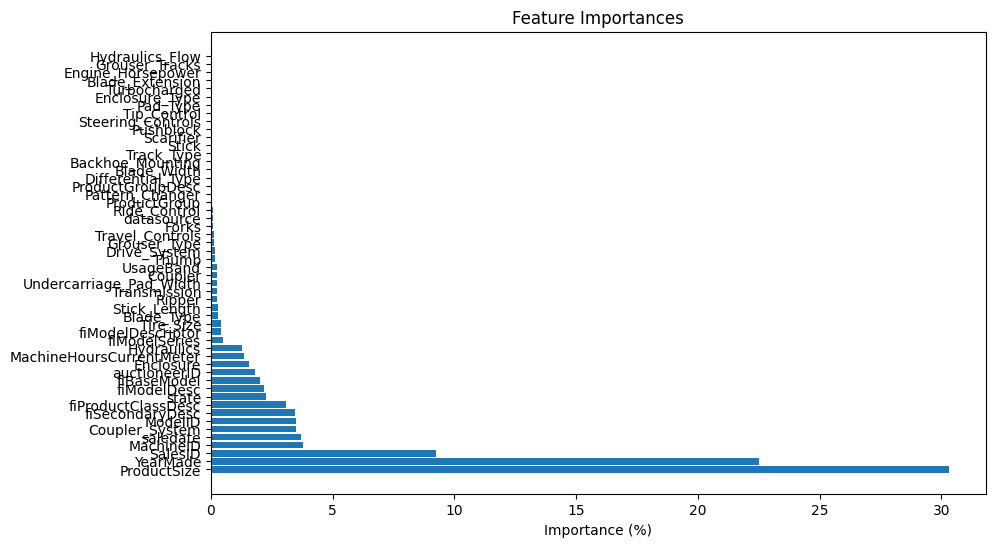

In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)
X = df.drop(columns=['SalePrice'] )  # Adjust the columns to drop based on your dataset
y = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


# Delete 21-52 col according to the feature importance:

<ipython-input-1-c88953bd4f2a>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 3846.2541736097355
Root Mean Squared Error (RMSE) on Test Data: 10268.434961775352

Feature Importances (in %):
                     Feature  Importance
14               ProductSize   25.029020
5                   YearMade   23.985946
0                    SalesID    8.009337
11           fiSecondaryDesc    7.662976
10               fiBaseModel    7.115503
9                fiModelDesc    4.902353
8                   saledate    4.898724
1                  MachineID    4.402821
15        fiProductClassDesc    3.380105
2                    ModelID    2.942754
16                     state    2.782197
4               auctioneerID    2.456984
6   MachineHoursCurrentMeter    1.088549
13         fiModelDescriptor    0.366527
12             fiModelSeries    0.221669
17              ProductGroup    0.213621
19              Drive_System    0.189138
7                  UsageBand    0.170564
18          ProductGroupDesc    0.166621
3                 data

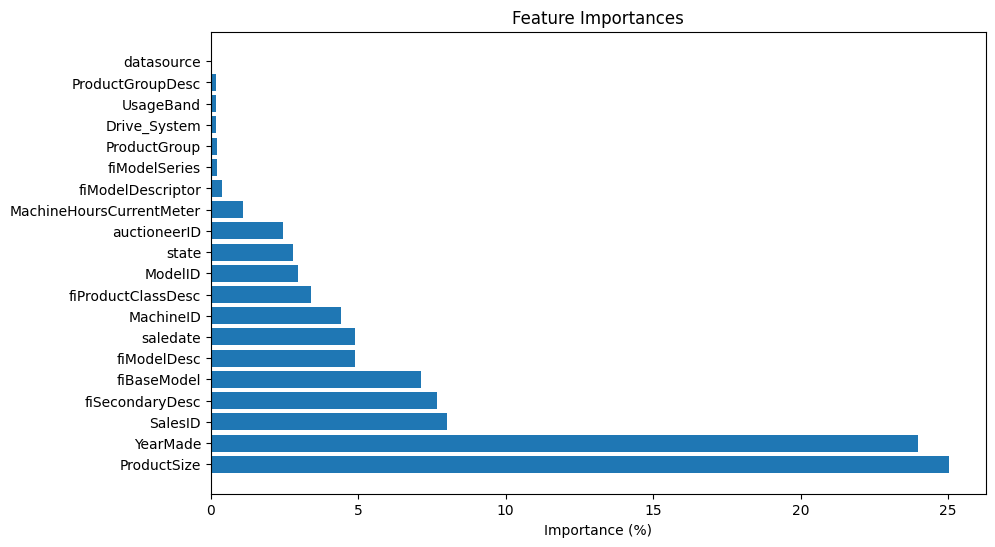

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X


# Drop the selected columns (including 'SalePrice')
X = df.drop(columns=['SalePrice'] + list(df.columns[21:53]))
y = df['SalePrice']
# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()


# adding Key Hyperparameters to RandomForestRegressor

<ipython-input-2-894f397640a5>:9: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


Root Mean Squared Error (RMSE) on Train Data: 11146.234415619689
Root Mean Squared Error (RMSE) on Test Data: 11363.306833367846

Feature Importances (in %):
                     Feature  Importance
5                   YearMade   30.051958
14               ProductSize   29.940428
10               fiBaseModel   10.893575
11           fiSecondaryDesc    8.963697
15        fiProductClassDesc    6.146624
0                    SalesID    5.882087
2                    ModelID    3.272223
9                fiModelDesc    1.985127
1                  MachineID    0.741807
6   MachineHoursCurrentMeter    0.465019
12             fiModelSeries    0.433990
13         fiModelDescriptor    0.374812
4               auctioneerID    0.178803
17              ProductGroup    0.162603
18          ProductGroupDesc    0.160565
8                   saledate    0.132379
19              Drive_System    0.090381
16                     state    0.090118
3                 datasource    0.024730
7                  Usa

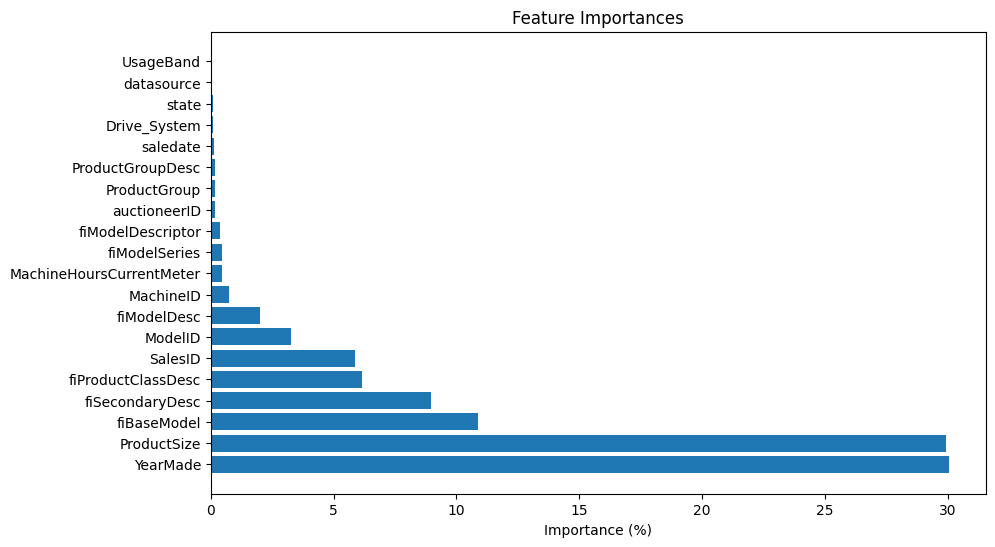

In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  # for sqrt function
import matplotlib.pyplot as plt  # for plotting

# Step 1: Upload the CSV file
df = pd.read_csv("Train.csv")



# Function to preprocess the data
def preprocess_data(X):
    # Convert categorical columns to category codes
    for col in X.columns:
        if X[col].dtype == 'object':  # If the column contains strings
            X[col] = X[col].astype('category')  # Convert to category type
        if X[col].dtype == 'category':  # If it's now a category dtype
            X[col] = X[col].cat.codes  # Convert category values to integer codes
    return X

# Step 2: Preprocessing (Assuming you have 'SalePrice' as the dependent variable)
# Split data into features (X) and target (y)

X = df.drop(columns=['SalePrice'] + list(df.columns[21:53]))  # Adjust the columns to drop based on your dataset
y = df['SalePrice']

# Preprocess the features to convert categorical columns into numeric codes
X = preprocess_data(X)

# Step 3: Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, n_estimators=100, random_state=42)  # Adjust contamination parameter as needed
outliers = iso_forest.fit_predict(X)
outliers = outliers == -1  # Mark outliers as True

# Filter out the outliers from the dataset
X_filtered = X[~outliers]
y_filtered = y[~outliers]

# Step 4: Train a Random Forest Regressor
# Split the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_split=5,min_samples_leaf=4)
rf_regressor.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Step 6: Calculate RMSE for Train and Test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  # RMSE for training data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))      # RMSE for test data

print(f'Root Mean Squared Error (RMSE) on Train Data: {rmse_train}')
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse_test}')

# Step 7: Get feature importances
importances = rf_regressor.feature_importances_

# Convert importances to percentages
importances_percentage = importances * 100

# Step 8: Create a DataFrame for easy viewing
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances as a table with percentages
print("\nFeature Importances (in %):")
print(importance_df)

# Optional: You can also plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel("Importance (%)")
plt.title("Feature Importances")
plt.show()






The Root Mean Squared Error (RMSE) values you're seeing indicate how well your model is performing on the training data versus the test data.

RMSE on Train Data: 11146.23: This represents how well the model fits the data it was trained on. Lower values are better because they indicate less error between the actual and predicted values.
RMSE on Test Data: 11363.31: This represents the error between the actual and predicted values for unseen (test) data. It gives an indication of how well the model generalizes to new data.
Analysis:
**Close RMSE values**: The fact that your RMSE values are close to each other on the train and test sets is generally a good sign. It suggests that your model is not overfitting or underfitting.

Overfitting would occur if the model performs significantly better on the training data than on the test data (i.e., the train RMSE is much lower than the test RMSE).
Underfitting would happen if both train and test RMSE are high and close to each other, indicating that the model is too simple to capture the patterns in the data.
**The RMSE values themselves: Whether these RMSE values are "good" or "bad" depends on the scale of your target variable, SalePrice in this case.**

If the target values (SalePrice) are in a large range (e.g., from $50,000 to $1,000,000), an RMSE of ~11,000 could be acceptable.
If SalePrice values are smaller, this RMSE might be relatively high, and you may need to improve the model. **bold text**
Possible Next Steps:
Hyperparameter Tuning: You can improve the performance by adjusting hyperparameters (like n_estimators, max_depth, min_samples_split, etc.) using GridSearchCV or RandomizedSearchCV.
Feature Engineering: Investigate if there are any features that could be added, transformed, or removed to improve performance. Feature scaling or handling categorical variables better could help.
Try Different Models: Experiment with other machine learning models like XGBoost, LightGBM, or Gradient Boosting, which often perform better for structured data.
Cross-validation: Use cross-validation to get a more reliable estimate of model performance.

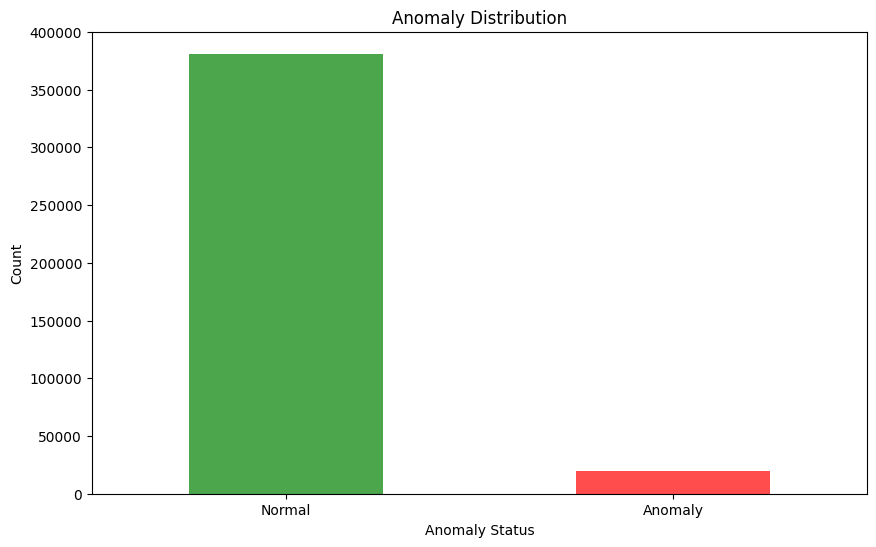

In [3]:
# Add anomaly score and label to the dataframe
df['anomaly_score'] = iso_forest.decision_function(X)  # Quantitative weirdness
df['anomaly'] = iso_forest.predict(X)  # Binary anomaly label
df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Step 9: Plot anomaly distribution
plt.figure(figsize=(10, 6))
df['anomaly'].value_counts().plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title("Anomaly Distribution")
plt.xlabel("Anomaly Status")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'], rotation=0)
plt.show()

In [4]:
df.anomaly.value_counts()

,count
anomaly,
1,381068
-1,20057


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Test RMSE:", mean_squared_error(y_test, y_test_pred) ** 0.5)
print("Train RMSE:", mean_squared_error(y_train, y_pred_train) ** 0.5)






Test RMSE: 9488.343454115187
Train RMSE: 3554.0146883338098
